# Parameters

In [391]:
CONFIG_LOCAL = False
#CONFIG_LOCAL = True

In [392]:
if CONFIG_LOCAL:
    config = {
        'data_folder'   : 'probes',
        'RUN'           : 'run_BWA_JKL_23_JU_1_orig',
        'chromosome'    : 'SL2.40ch12',
        'scaffold'      : 'SL2.40sc05611',
        'out_folder'    : 'reports',
        'out_extensions': ['eps', 'png']
    }

    if True:
        config['BAC'            ] = 'JBPP0904'
        config['BAC_coord_start'] = 967164
        config['BAC_coord_end'  ] = 970727
        config['BAC_coord'      ] = '%012d-%012d' % ( config['BAC_coord_start'], config['BAC_coord_end'  ] )
        config['RUN'            ] = 'run_BWA_JKL_23_JU_1_orig_PROBES'

In [393]:
if CONFIG_LOCAL:
    %run -i probes_cfg.ipynb

In [394]:
if CONFIG_LOCAL:
    %run -i probes_cfg_header.ipynb

Config
	BAC            : JBPP0904
	BAC_coord      : 000000967164-000000970727
	BAC_coord_end  : 970727
	BAC_coord_start: 967164
	RUN            : run_BWA_JKL_23_JU_1_orig_PROBES
	chromosome     : SL2.40ch12
	data_folder    : probes
	out_extensions : ['eps', 'png', 'pdf']
	out_folder     : reports
	scaffold       : SL2.40sc05611
Max Rows     : 10000
Column Names
	K-mer Coverage
	Sequencing Coverage
	BLAST Coverage
	Ns
	AGP Contig
	AGP Gap
	K-mer Coverage averaged: 500 bp
	K-mer Coverage averaged: 5 Kbp
	K-mer Coverage averaged: 1 Mbp


# Imports

In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import operator

#import pylab
#pylab.show()

%pylab inline

pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

from IPython.display import HTML, display
def addHeader(level, text):
    display( HTML('''<h%(level)d>%(text)s</h%(level)d>''' % {'level':level, 'text':text}) )

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Files

## Input Files

In [396]:
addHeader(1,'Files')
addHeader(2,'Input Files')
"""
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.cov
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.cov.prop.cov
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.pos
"""
    
KmerCoverageFile       = "%(data_folder)s/%(RUN)s/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.%(chromosome)s.sam.%(scaffold)s.sam.cov.prop.cov.gz" % config
SequencingCoverageFile = "%(data_folder)s/mapping/out/S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.%(chromosome)s.pos.cov.%(scaffold)s.cov.gz"    % config
AgpContigFile          = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.contig.agp.cov.gz"  % config
AgpGapFile             = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.gap.agp.cov.gz"     % config
AgpOtherFile           = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.other.agp.cov.gz"   % config
AgpUnknownFile         = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.unknown.agp.cov.gz" % config
NsFile                 = "%(data_folder)s/Ns/S_lycopersicum_scaffolds.fa_NONE.tab.%(chromosome)s.tab.%(scaffold)s.tab.cov.gz"     % config
infiles                = [KmerCoverageFile, SequencingCoverageFile, 
                          AgpContigFile, AgpGapFile, 
                          AgpUnknownFile, AgpOtherFile, NsFile]

if BAC_MODE:
    """

                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.SL2.40ch12.pos.cov.SL2.40sc05611.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc05611.sam.cov.prop.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727_Product.fasta.blast.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.contig.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.gap.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.other.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.unknown.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds.fa_NONE.tab.SL2.40ch12.tab.SL2.40sc05611.tab.cov
    """
                                                      
    config['in_base_name'] = "%(data_folder)s/%(RUN)s/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.%(chromosome)s.%(scaffold)s.%(BAC)s_primer.%(BAC_coord)s" % config
    KmerCoverageFile       =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.%(chromosome)s.sam.%(scaffold)s.sam.cov.prop.cov.gz" % config
    SequencingCoverageFile =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.%(chromosome)s.pos.cov.%(scaffold)s.cov.gz"        % config
    BlastCoverageFile      =                                                                                                                                      "%(in_base_name)s_Product.fasta.blast.cov.gz"                                                         % config
    AgpContigFile          =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.contig.agp.cov.gz"  % config
    AgpGapFile             =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.gap.agp.cov.gz"     % config
    AgpOtherFile           =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.other.agp.cov.gz"   % config
    AgpUnknownFile         =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.unknown.agp.cov.gz" % config
    NsFile                 =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds.fa_NONE.tab.%(chromosome)s.tab.%(scaffold)s.tab.cov.gz"    % config
    
    infiles                = [KmerCoverageFile , SequencingCoverageFile, 
                              BlastCoverageFile, AgpContigFile, 
                              AgpGapFile       , AgpUnknownFile, 
                              AgpOtherFile     , NsFile]


print "%-22s: %-5s %s" % ( "KmerCoverageFile"      , os.path.exists(KmerCoverageFile)      , KmerCoverageFile       )
print "%-22s: %-5s %s" % ( "SequencingCoverageFile", os.path.exists(SequencingCoverageFile), SequencingCoverageFile )
print "%-22s: %-5s %s" % ( "AgpContigFile"         , os.path.exists(AgpContigFile)         , AgpContigFile          )
print "%-22s: %-5s %s" % ( "AgpGapFile"            , os.path.exists(AgpGapFile)            , AgpGapFile             )
print "%-22s: %-5s %s" % ( "AgpOtherFile"          , os.path.exists(AgpOtherFile)          , AgpOtherFile           )
print "%-22s: %-5s %s" % ( "AgpUnknownFile"        , os.path.exists(AgpUnknownFile)        , AgpUnknownFile         )
print "%-22s: %-5s %s" % ( "NsFile"                , os.path.exists(NsFile)                , NsFile                 )



if BAC_MODE:
    print "%-22s: %-5s %s" % ( "BlastCoverageFile" , os.path.exists(BlastCoverageFile)     , BlastCoverageFile      )

print



if not all([os.path.exists(x) for x in infiles]):
    print "missing file"

else:
    print "all files present"
    

KmerCoverageFile      : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc05611.sam.cov.prop.cov.gz
SequencingCoverageFile: True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.SL2.40ch12.pos.cov.SL2.40sc05611.cov.gz
AgpContigFile         : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.contig.agp.cov.gz
AgpGapFile            : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds

## Output Files

In [397]:
addHeader(2,'Output Files')

config['out_bn'        ] = "%(out_folder)s/%%s/%(RUN)s_%(chromosome)s_%(scaffold)s_prop" % config
config['out_bn_img'    ] = "%(out_bn)s.%%s.%%s"                                            % config

if BAC_MODE:
    config['out_bn'       ] = "%(out_folder)s/%%s/%(RUN)s_%(chromosome)s_%(scaffold)s_%(BAC)s_%(BAC_coord)s" % config
    config['out_bn_img'   ] = "%(out_bn)s.%%s.%%s"                                                             % config

    
output_files = {
    'all_data'                        : [ config['out_bn_img']  % (ext, 'raw_data'                        , 'csv'     ) for ext in config['out_extensions'] ],
    'all_data_full'                   : [ config['out_bn_img']  % (ext, 'K-raw_data'                      , 'full.csv') for ext in config['out_extensions'] ],
    'K-mer Coverage Stats'            : [ config['out_bn_img']  % (ext, 'K-mer_Coverage_Stats'            , ext       ) for ext in config['out_extensions'] ],
    'Sequencing Coverage Stats'       : [ config['out_bn_img']  % (ext, 'Sequencing_Coverage_Stats'       , ext       ) for ext in config['out_extensions'] ],
    'K-mer Coverage Distribution'     : [ config['out_bn_img']  % (ext, 'K-mer_Coverage_Distribution'     , ext       ) for ext in config['out_extensions'] ],
    'Sequencing Coverage Distribution': [ config['out_bn_img']  % (ext, 'Sequencing_Coverage_Distribution', ext       ) for ext in config['out_extensions'] ],
    'Gaps Distribution'               : [ config['out_bn_img']  % (ext, 'Gaps_Distribution'               , ext       ) for ext in config['out_extensions'] ],
    'Ns Distribution'                 : [ config['out_bn_img']  % (ext, 'Ns_Distribution'                 , ext       ) for ext in config['out_extensions'] ],
    'Combined graph'                  : [ config['out_bn_img']  % (ext, 'Combined_graph'                  , ext       ) for ext in config['out_extensions'] ]
}


if BAC_MODE:
    output_files['BLAST Coverage Stats'       ] = [ config['out_bn_img'] % (ext, 'BLAST_Coverage_Stats'       , ext) for ext in config['out_extensions'] ]
    output_files['BLAST Coverage Distribution'] = [ config['out_bn_img'] % (ext, 'BLAST_Coverage_Distribution', ext) for ext in config['out_extensions'] ]

    
for of in sorted(output_files.keys()):
    print "%-32s:\n - %s" % ( of, "\n - ".join( output_files[of] ) )

BLAST Coverage Distribution     :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.eps
 - reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.png
 - reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.pdf
BLAST Coverage Stats            :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.eps
 - reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.png
 - reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.pdf
Combined graph                  :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_0000

In [398]:
class size_controller(object):
    def __init__(self, w, h):
        self.w = w
        self.h = h
        
    def __enter__(self):
        self.o = rcParams['figure.figsize']
        rcParams['figure.figsize'] = self.w, self.h
        return None
    
    def __exit__(self, type, value, traceback):
        rcParams['figure.figsize'] = self.o
        
col_type_int  = np.int64
col_type_flo  = np.float64
col_type_str  = np.object
col_type_bol  = np.int8

# Read Files

## K-mer Coverage File

In [399]:
addHeader(1,'Read Files')
addHeader(2,'K-mer Coverage File')

col_info = [
    [ "Position"                             , col_type_int ], 
    [ "K-mer Coverage"                       , col_type_flo ], 
    [ "K-mer Coverage averaged: 500 bp"      , col_type_flo ], 
    [ "K-mer Coverage averaged: 2.5 Kbp"     , col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp"       , col_type_flo ], 
    [ "K-mer Coverage averaged: 50 Kbp"      , col_type_flo ], 
    [ "K-mer Coverage averaged: 1 Mbp"       , col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp before", col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp after" , col_type_flo ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print "\n".join( col_names )

In [400]:
SKIP_ROWS = 1

print KmerCoverageFile

KmerData  = pd.read_csv(KmerCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")
    
print "Loaded %d rows and %d columns" % ( KmerData.shape[0], KmerData.shape[1] )

if PARSE_VERBOSE:
    print KmerData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc05611.sam.cov.prop.cov.gz
Loaded 3564 rows and 9 columns


## Sequencing Coverage File

In [401]:
addHeader(2,'Sequencing Coverage File')

col_info = [
    [ "Position"                             , col_type_int ], 
    [ "Sequencing Coverage"                  , col_type_int ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [402]:
SKIP_ROWS = 0

print SequencingCoverageFile

SequencingCoverageData  = pd.read_csv(SequencingCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")

print "Loaded %d rows and %d columns" % ( SequencingCoverageData.shape[0], SequencingCoverageData.shape[1] )

if PARSE_VERBOSE:
    print SequencingCoverageData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.SL2.40ch12.pos.cov.SL2.40sc05611.cov.gz
Loaded 3564 rows and 2 columns


In [403]:
if BAC_MODE:
    addHeader(2,'BLAST')

    col_info = [
        [ "Position"                             , col_type_int ], 
        [ "BLAST Coverage"                       , col_type_flo ]
    ]

    col_names=[cf[0] for cf in col_info]
    col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

    if PARSE_VERBOSE:
        print col_names
        col_types

In [404]:
if BAC_MODE:
    SKIP_ROWS = 0
    
    print BlastCoverageFile
    
    BlastCoverageData  = pd.read_csv(BlastCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                            skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")
        
    print "Loaded %d rows and %d columns" % ( BlastCoverageData.shape[0], BlastCoverageData.shape[1] )
    
    if PARSE_VERBOSE:
        print BlastCoverageData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727_Product.fasta.blast.cov.gz
Loaded 3564 rows and 2 columns


## AGP

In [405]:
addHeader(2,'AGP')
SKIP_ROWS = 0

### Contig

In [406]:
addHeader(3,'Contig')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Contig"                  , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [407]:
print AgpContigFile

AgpContigData  = pd.read_csv(AgpContigFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")

print "Loaded %d rows and %d columns" % ( AgpContigData.shape[0], AgpContigData.shape[1] )

if PARSE_VERBOSE:
    print AgpContigData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.contig.agp.cov.gz
Loaded 3564 rows and 2 columns


### Gap

In [408]:
addHeader(3,'Gap')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Gap"                     , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [409]:
print AgpGapFile

AgpGapData  = pd.read_csv(AgpGapFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")
    
print "Loaded %d rows and %d columns" % ( AgpGapData.shape[0], AgpGapData.shape[1] )

if PARSE_VERBOSE:
    print AgpGapData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.gap.agp.cov.gz
Loaded 3564 rows and 2 columns


### Unknown

In [410]:
addHeader(3,'Unknown')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Unknown"                 , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [411]:
print AgpUnknownFile

AgpUnknownData  = pd.read_csv(AgpUnknownFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")
    
print "Loaded %d rows and %d columns" % ( AgpUnknownData.shape[0], AgpUnknownData.shape[1] )

if PARSE_VERBOSE:
    print AgpUnknownData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.unknown.agp.cov.gz
Loaded 3564 rows and 2 columns


### Other

In [412]:
addHeader(3,'Other')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Other"                   , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [413]:
print AgpOtherFile

AgpOtherData  = pd.read_csv(AgpOtherFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")

print "Loaded %d rows and %d columns" % ( AgpOtherData.shape[0], AgpOtherData.shape[1] )

if PARSE_VERBOSE:
    print AgpOtherData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.other.agp.cov.gz
Loaded 3564 rows and 2 columns


## Ns

In [414]:
addHeader(2,'Ns')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "Ns"                          , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [415]:
print NsFile

NsData  = pd.read_csv(NsFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#", compression="gzip")
    
print "Loaded %d rows and %d columns" % ( NsData.shape[0], NsData.shape[1] )

if PARSE_VERBOSE:
    print NsData.head()

probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds.fa_NONE.tab.SL2.40ch12.tab.SL2.40sc05611.tab.cov.gz
Loaded 3564 rows and 2 columns


# Merge

In [416]:
addHeader(1,'Merge')

Data = pd.DataFrame(KmerData, copy=True)

Data.combine_first( KmerData )
Data[ "AGP Contig"          ] = AgpContigData[          "AGP Contig"          ]
Data[ "AGP Gap"             ] = AgpGapData[             "AGP Gap"             ]
Data[ "AGP Unknown"         ] = AgpUnknownData[         "AGP Unknown"         ]
Data[ "AGP Other"           ] = AgpOtherData[           "AGP Other"           ]
Data[ "Ns"                  ] = NsData[                 "Ns"                  ]
Data[ "Sequencing Coverage" ] = SequencingCoverageData[ "Sequencing Coverage" ]
if BAC_MODE:
    Data[ "BLAST Coverage"  ] = BlastCoverageData[      "BLAST Coverage"      ]

print "Saved %d rows and %d columns" % ( Data.shape[0], Data.shape[1] )

if PARSE_VERBOSE:
    print Data.head()

Saved 3564 rows and 16 columns


#Stats

In [417]:
addHeader(1,'Stats')
addHeader(2,'Describe')

print Data.describe()

          Position  K-mer Coverage  K-mer Coverage averaged: 500 bp  \
count  3564.000000     3564.000000                      3564.000000   
mean   1781.500000        0.987118                         0.979846   
std    1028.982507        0.042654                         0.023863   
min       0.000000        0.652174                         0.868090   
25%     890.750000        1.000000                         0.976048   
50%    1781.500000        1.000000                         0.988024   
75%    2672.250000        1.000000                         0.994012   
max    3563.000000        1.000000                         0.998004   

       K-mer Coverage averaged: 2.5 Kbp  K-mer Coverage averaged: 5 Kbp  \
count                       3564.000000                     3564.000000   
mean                           0.972331                        0.950346   
std                            0.015624                        0.020099   
min                            0.921127                     

## Quantiles

In [418]:
addHeader(2,'Quantiles')

print Data['K-mer Coverage'].quantile([.01, .025, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .975, .99])

addHeader(2,'Percentiles')
print "count     ", Data['K-mer Coverage'].count()
print "count == 1", Data['K-mer Coverage'][ Data['K-mer Coverage'] == 1].count()
print "prop  == 1", Data['K-mer Coverage'][ Data['K-mer Coverage'] == 1].count() * 1.0 / Data['K-mer Coverage'].count()

0.010    0.782609
0.025    0.869565
0.050    0.913043
0.100    0.956522
0.200    1.000000
0.300    1.000000
0.400    1.000000
0.500    1.000000
0.600    1.000000
0.700    1.000000
0.800    1.000000
0.900    1.000000
0.950    1.000000
0.975    1.000000
0.990    1.000000
dtype: float64


count      3564
count == 1 3033
prop  == 1 0.85101010101


In [419]:
addHeader(2,'Median')

print Data.median()

Position                                 1781.500000
K-mer Coverage                              1.000000
K-mer Coverage averaged: 500 bp             0.988024
K-mer Coverage averaged: 2.5 Kbp            0.977739
K-mer Coverage averaged: 5 Kbp              0.952210
K-mer Coverage averaged: 50 Kbp             0.645013
K-mer Coverage averaged: 1 Mbp              0.759918
K-mer Coverage averaged: 5 Kbp before       0.883462
K-mer Coverage averaged: 5 Kbp after        0.922416
AGP Contig                                  1.000000
AGP Gap                                     0.000000
AGP Unknown                                 0.000000
AGP Other                                   0.000000
Ns                                          0.000000
Sequencing Coverage                       132.000000
BLAST Coverage                              1.000000
dtype: float64


In [420]:
addHeader(2,'MAD')
print Data.mad()

Position                                 891.000000
K-mer Coverage                             0.021926
K-mer Coverage averaged: 500 bp            0.014734
K-mer Coverage averaged: 2.5 Kbp           0.013925
K-mer Coverage averaged: 5 Kbp             0.016092
K-mer Coverage averaged: 50 Kbp            0.013832
K-mer Coverage averaged: 1 Mbp             0.000161
K-mer Coverage averaged: 5 Kbp before      0.048236
K-mer Coverage averaged: 5 Kbp after       0.015645
AGP Contig                                 0.000000
AGP Gap                                    0.000000
AGP Unknown                                0.000000
AGP Other                                  0.000000
Ns                                         0.000000
Sequencing Coverage                       30.920078
BLAST Coverage                             0.050039
dtype: float64


# Plot

## K-mer Coverage Stats

Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Stats.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Stats.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Stats.pdf


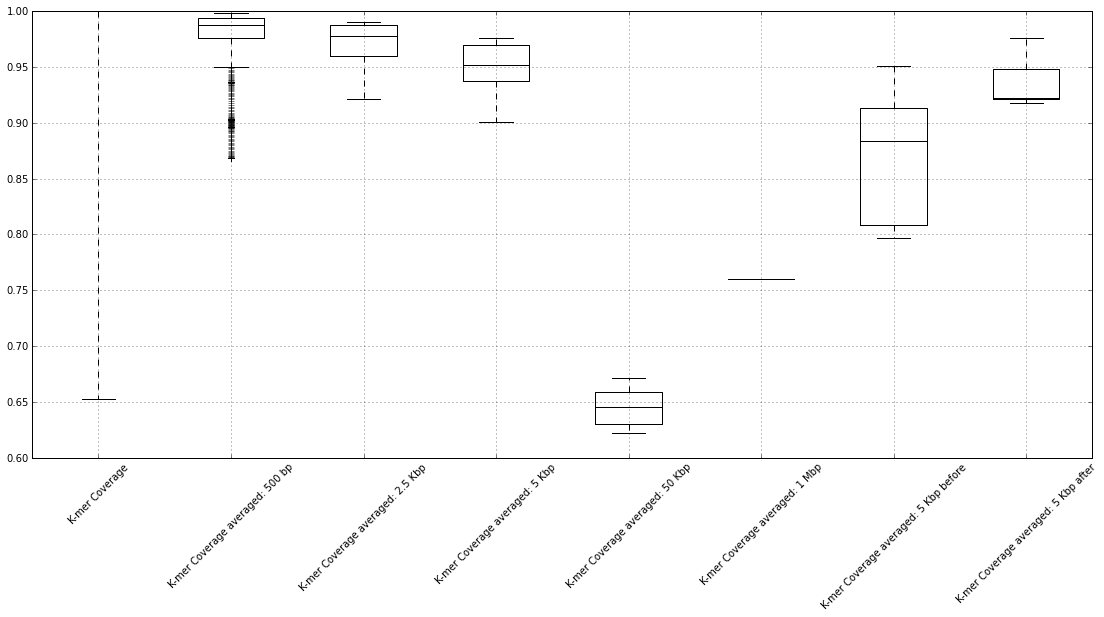

In [421]:
addHeader(1,'Plot')
addHeader(2,'K-mer Coverage Stats')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = Data.boxplot(column=["K-mer Coverage", 
                               "K-mer Coverage averaged: 500 bp",
                               "K-mer Coverage averaged: 2.5 Kbp",
                               "K-mer Coverage averaged: 5 Kbp",
                               "K-mer Coverage averaged: 50 Kbp",
                               "K-mer Coverage averaged: 1 Mbp",
                               "K-mer Coverage averaged: 5 Kbp before",
                               "K-mer Coverage averaged: 5 Kbp after"], return_type='dict', rot=45)
    
    plt.setp(bqc['boxes'   ], color='black')
    plt.setp(bqc['medians' ], color='black')
    plt.setp(bqc['whiskers'], color='black')
    plt.setp(bqc['fliers'  ], color='black')
    
    for of in output_files['K-mer Coverage Stats']:
        print "Saving Image:", of
        savefig(of)

## Sequencing Coverage Stats

Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Stats.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Stats.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Stats.pdf


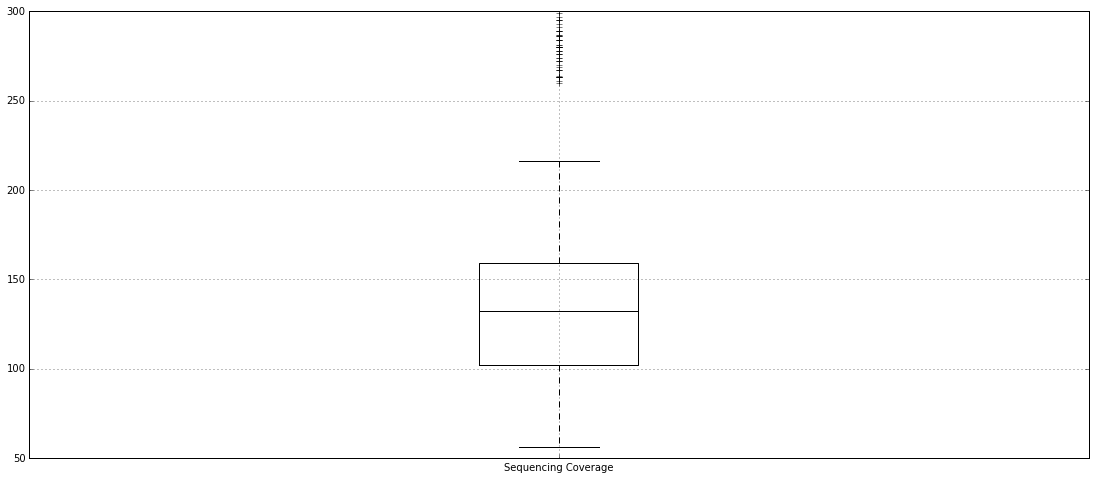

In [422]:
addHeader(2,'Sequencing Coverage Stats')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = Data.boxplot(column=['Sequencing Coverage'], return_type='dict')
    
    plt.setp(bqc['boxes'   ], color='black')
    plt.setp(bqc['medians' ], color='black')
    plt.setp(bqc['whiskers'], color='black')
    plt.setp(bqc['fliers'  ], color='black')
    
    for of in output_files['Sequencing Coverage Stats']:
        print "Saving Image:", of
        savefig(of)

Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.pdf


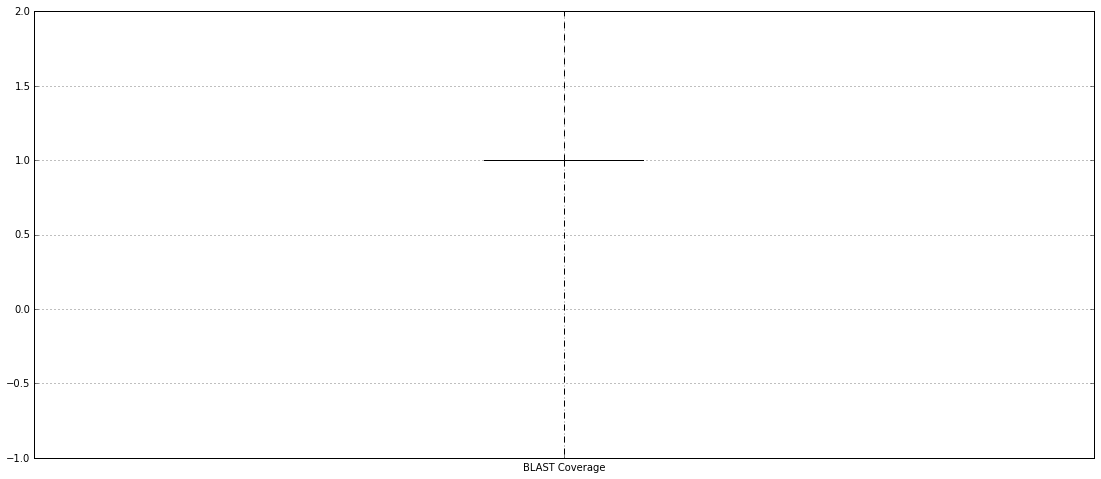

In [423]:
if BAC_MODE:
    addHeader(2,'BLAST Coverage Stats')
    
    with size_controller(FULL_FIG_W, FULL_FIG_H):
        bqc = Data.boxplot(column=['BLAST Coverage'], return_type='dict')
        plt.setp(bqc['boxes'   ], color='black')
        plt.setp(bqc['medians' ], color='black')
        plt.setp(bqc['whiskers'], color='black')
        plt.setp(bqc['fliers'  ], color='black')

        for of in output_files['BLAST Coverage Stats']:
            print "Saving Image:", of
            savefig(of)

## K-mer Coverage Distribution

Number of rows: 3564
Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Distribution.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Distribution.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.K-mer_Coverage_Distribution.pdf


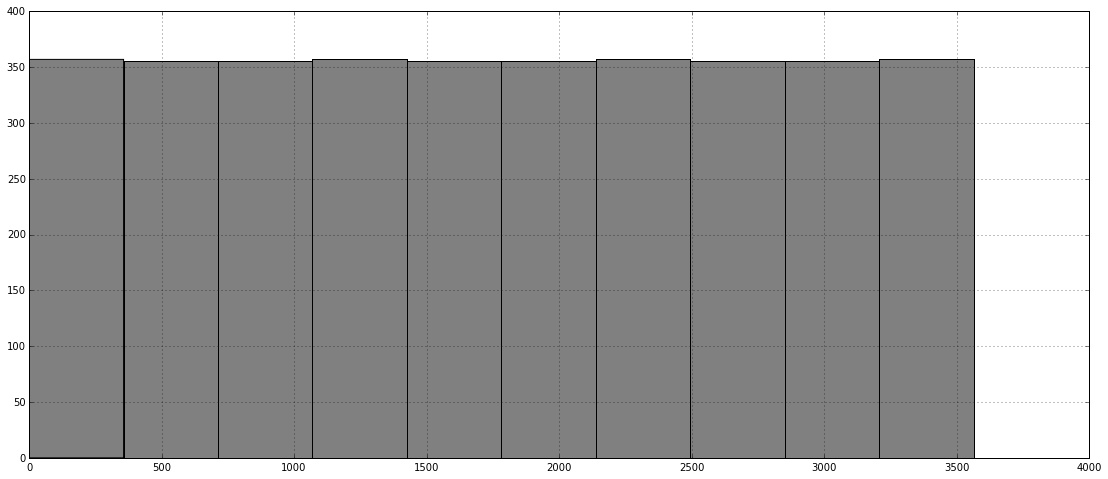

In [424]:
addHeader(2,'K-mer Coverage Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["K-mer Coverage"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)

        for of in output_files['K-mer Coverage Distribution']:
            print "Saving Image:", of
            savefig(of)

## Sequencing Coverage Distribution

Number of rows: 3564
Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Distribution.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Distribution.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.Sequencing_Coverage_Distribution.pdf


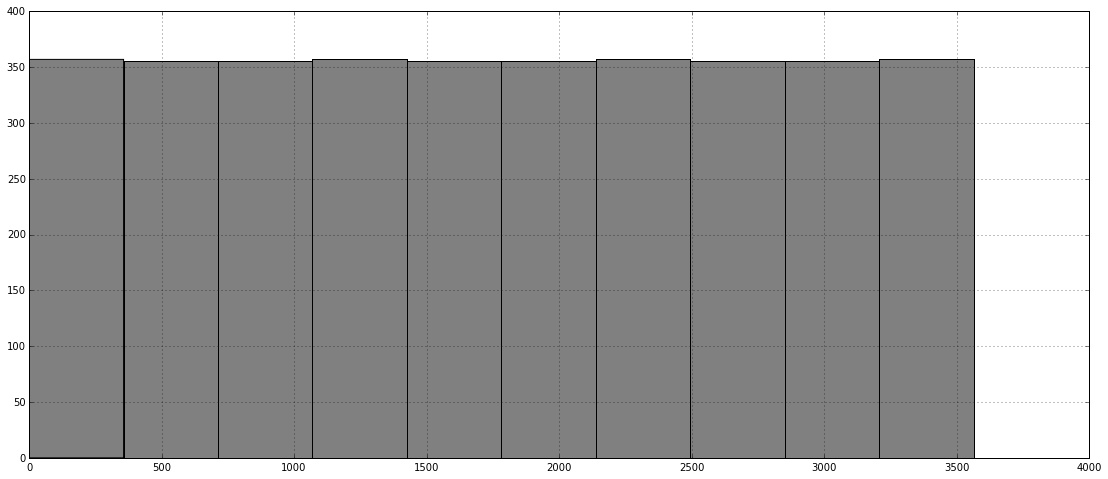

In [425]:
addHeader(2,'Sequencing Coverage Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["Sequencing Coverage"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)

        for of in output_files['Sequencing Coverage Distribution']:
            print "Saving Image:", of
            savefig(of)

Number of rows: 3560
Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.eps
Saving Image: reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.png
Saving Image: reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.pdf


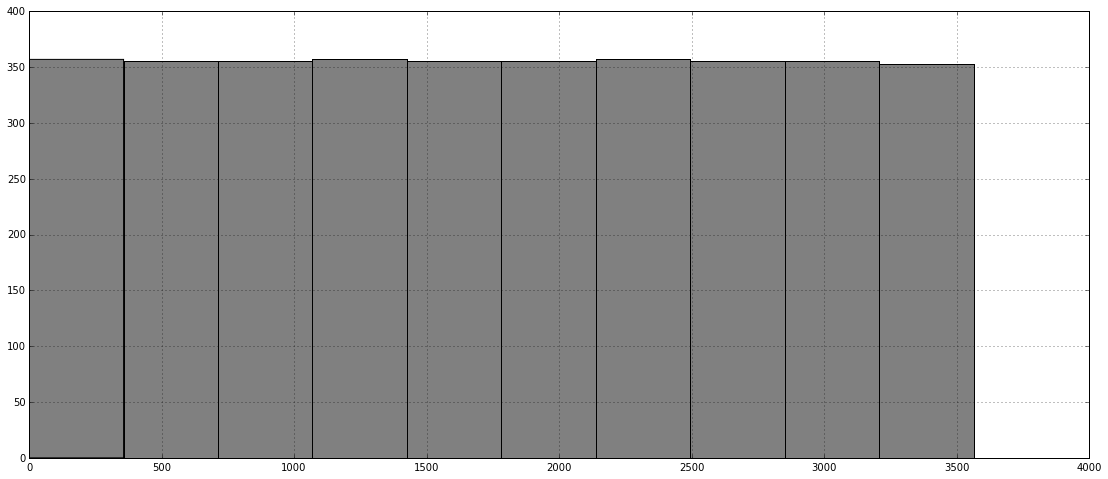

In [426]:
if BAC_MODE:
    addHeader(2,'BLAST Coverage Distribution')
    
    with size_controller(FULL_FIG_W, FULL_FIG_H):
        hf = Data[ Data["BLAST Coverage"] > 0 ]['Position']
    
        print "Number of rows:", hf.size

        if hf.size > 0:
            hs = hf.hist(color=HISTOGRAM_COLOR)
            
            for of in output_files['BLAST Coverage Distribution']:
                print "Saving Image:", of
                savefig(of)

## Gaps Distribution

In [427]:
addHeader(2,'Gaps Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["AGP Gap"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)
        
        for of in output_files['Gaps Distribution']:
            print "Saving Image:", of
            savefig(of)

Number of rows: 0


## Ns Distribution

In [428]:
addHeader(2,'Ns Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["Ns"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)
        
        for of in output_files['Ns Distribution']:
            print "Saving Image:", of
            savefig(of)

Number of rows: 0


## CSV Output

In [429]:
addHeader(2,'CSV Output')

SAMPLE_EVERY = 1

while ( Data.shape[0] / SAMPLE_EVERY ) > MAX_ROWS:
    SAMPLE_EVERY += 1
    
print "Original Size %d rows and %d columns" % ( Data.shape[0], Data.shape[1] )

if SAMPLE_EVERY != 1:
    print "SAMPLING EVERY %d ROWS" % SAMPLE_EVERY
    
    for of in output_files['all_data_full']:
        print "Saving full data to: ", of
        Data.to_csv(of, sep='\t', index=False)
    
    DataSampled = Data[::SAMPLE_EVERY]

    print "New Size %d rows and %d columns" % ( DataSampled.shape[0], DataSampled.shape[1] )
    
    if PARSE_VERBOSE:
        print DataSampled.head()

else:
    print "no need to sample"
    DataSampled = Data


for of in output_files['all_data']:
    print "Saving data to     :", of
    DataSampled.to_csv(of, sep='\t', index=False)

Original Size 3564 rows and 16 columns
no need to sample
Saving data to     : reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.raw_data.csv
Saving data to     : reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.raw_data.csv
Saving data to     : reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.raw_data.csv


## Combined Graph

i 3 y 9 col 3 num cols 9 col name Ns
i 4 y 10 col 4 num cols 9 col name AGP Contig
i 5 y 11 col 5 num cols 9 col name AGP Gap
i 6 y 12 col 8 num cols 9 col name K-mer Coverage averaged: 500 bp
i 7 y 13 col 10 num cols 9 col name K-mer Coverage averaged: 5 Kbp
i 8 y 14 col 12 num cols 9 col name K-mer Coverage averaged: 1 Mbp
For axis 0 col name K-mer Coverage
K-mer Coverage 0.0 1.0 1.0 0.2
For axis 1 col name Sequencing Coverage
Sequencing Coverage 0.0 300.0 300.0 60.0
For axis 2 col name BLAST Coverage
BLAST Coverage 0.0 2.0 2.0 0.4
For axis 3 col name Ns
For axis 4 col name AGP Contig
For axis 5 col name AGP Gap
For axis 6 col name K-mer Coverage averaged: 500 bp
K-mer Coverage averaged: 500 bp 0.0 1.0 1.0 1.0
For axis 7 col name K-mer Coverage averaged: 5 Kbp
K-mer Coverage averaged: 5 Kbp 0.0 1.0 1.0 1.0
For axis 8 col name K-mer Coverage averaged: 1 Mbp
K-mer Coverage averaged: 1 Mbp 0.0 0.8 0.8 0.8
Saving Image: reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611

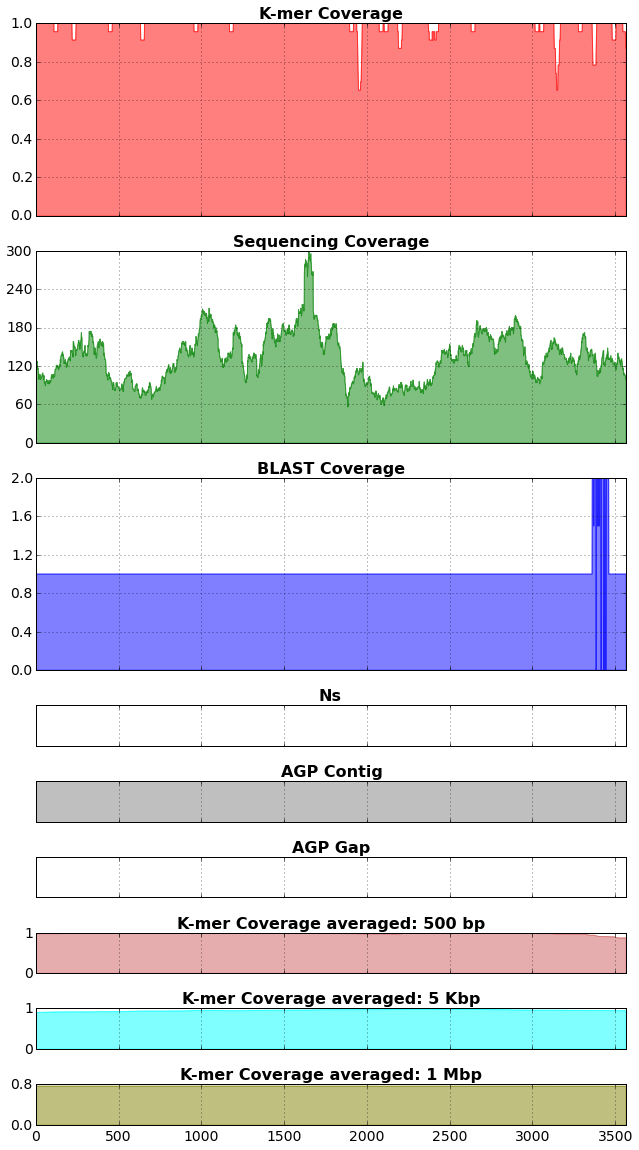

In [436]:
addHeader(2,'Combined Graph')

num_cols = sum([1 if x is not None else 0 for x in cols_to_plot])
#print "num_cols:", num_cols, " :: ", ", ".join(sorted(list(set([x[0] if x is not None else None for x in cols_to_plot])-set([None]))))
#print "\n".join( [ str( (x, y[0]) ) if y is not None else str( (x, "None") ) for x,y in enumerate(cols_to_plot) ] )

with size_controller(CHROM_FIG_W, CHROM_FIG_H):
    if True:
        #fig, axes = plt.subplots(nrows=len(cols_to_plot)+2, ncols=1)
        f = plt.figure()
        
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        num_extra_rows = 3
        num_row_span   = 3
        
        num_cols_e     = num_cols + (num_extra_rows*num_row_span)
        axes           = []

        axes.append( [ plt.subplot2grid((num_cols_e,1), (0           , 0), rowspan=num_row_span) ] + cols_to_plot[0] )
        axes.append( [ plt.subplot2grid((num_cols_e,1), (num_row_span, 0), rowspan=num_row_span) ] + cols_to_plot[1] )
        
        #print "num_extra_rows", num_extra_rows
        #print "num_row_span  ", num_row_span
        #print "num_cols_e    ", num_cols_e
        
        if BAC_MODE:
            axes.append( [ plt.subplot2grid((num_cols_e,1), (num_row_span*2, 0), rowspan=num_row_span) ] + cols_to_plot[2] )
        else:
            axes.append( None )
            
        col_num  = 3
        plot_num = 0
        for i in xrange( col_num, len(cols_to_plot) ):
            y = (num_extra_rows*num_row_span)+plot_num
            
            try:
                cold = cols_to_plot[col_num]
            except:
                continue
                
            while ( cold is None ) and ( col_num < len(cols_to_plot)-1 ):
                col_num += 1
                #print " cn", col_num,"l",len(cols_to_plot)
                cold     = cols_to_plot[col_num]
            
            if cold is not None:
                #print 'i', i, 'y', y, 'col', col_num, 'num cols', num_cols, 'col name', cold[0]
                axes.append( [ plt.subplot2grid((num_cols_e,1), (y, 0) ) ] + cold )
                col_num  += 1
                plot_num += 1

        #print "num_cols", num_cols
        #print "axes"    , len(axes)

        axis_j = 0
        for axis_i, axis_data in enumerate(axes):
            if axis_data is None:
                #print " skip"
                continue
            
            axis, col_to_plot, col_ylim, col_yticks, col_color = axis_data
            
            #print "For axis", axis_i, "col name", col_to_plot
            if axis is None:
                #print " skip"
                continue
                
            p = DataSampled[col_to_plot].plot(ax=axis, kind='area', fontsize=14, stacked=False, color=col_color)
            
            axis.set_title(col_to_plot, fontdict={'fontsize': 16, 'fontweight': 'bold'})
            
            if col_ylim is not None:
                col_ylim_min, col_ylim_max = col_ylim
                
                if col_ylim_min is not None:
                    axis.set_ylim( bottom = col_ylim_min )
                
                if col_ylim_max is not None:
                    axis.set_ylim( top    = col_ylim_max )
            
            
            if col_yticks is not None:
                if col_yticks == 0:
                    axis.set_yticks([])
                    
                else:
                    ylim_min, ylim_max = axis.get_ylim()
                    ylim_diff = ylim_max - ylim_min
                    ylim_step = ylim_diff / (col_yticks*1.0)
                    #print col_to_plot, ylim_min, ylim_max, ylim_diff, ylim_step
                    axis.set_yticks(np.arange(ylim_min,ylim_max+ylim_step,ylim_step))
            
    plt.tight_layout()
    curr_fig = plt.gcf()
    #curr_fig.set_size_inches(CHROM_FIG_W/5.0, CHROM_FIG_H/5.0)
    for of in output_files['Combined graph']:
        print "Saving Image:", of
        curr_fig.savefig(of, dpi=300)
    #curr_fig.set_size_inches(CHROM_FIG_W, CHROM_FIG_H)

In [431]:
if CONFIG_LOCAL:
    %run -i probes_cfg_footer.ipynb

Saulo Aflitos Last updated: 30/06/2015 

CPython 2.7.9
IPython 3.0.0

numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pandas 0.16.0
IPython 3.0.0

compiler   : GCC 4.4.7 20120313 (Red Hat 4.4.7-1)
system     : Linux
release    : 3.13.0-46-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 80
interpreter: 64bit
host name  : assembly
Git hash   : 5f46e34ab0d66890231b7cebb0d492969ea23a90
